# Image Preprocessing for Pneumonia Classification

[Open in Colab](https://colab.research.google.com/github/omarsagoo/AI-pneumonia-classifier/blob/main/notebooks/preprocessing.ipynb)

This notebook handles image loading, preprocessing, and augmentation for the chest X-ray dataset used in the pneumonia classification project.

## Objectives

- Load and inspect raw X-ray images
- Normalize image dimensions and pixel intensities
- Apply grayscale conversion
- Perform data augmentation to reduce overfitting
- Prepare data generators for model training and evaluation

## Install Dependecies and Import Required Packages

In [1]:
# Tensorflow dependecy
!pip install tensorflow

# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.37.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   

## Directory Structure

Define paths to the training, validation, and test datasets.

In [3]:
base_dir = '/content/drive/MyDrive/pneumonia-data/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

## Visual Inspection of Images

Display a few sample images from each class to understand dataset characteristics.


In [4]:
def show_sample_images(directory, label, num_images=5):
    path = os.path.join(directory, label)
    images = os.listdir(path)[:num_images]
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

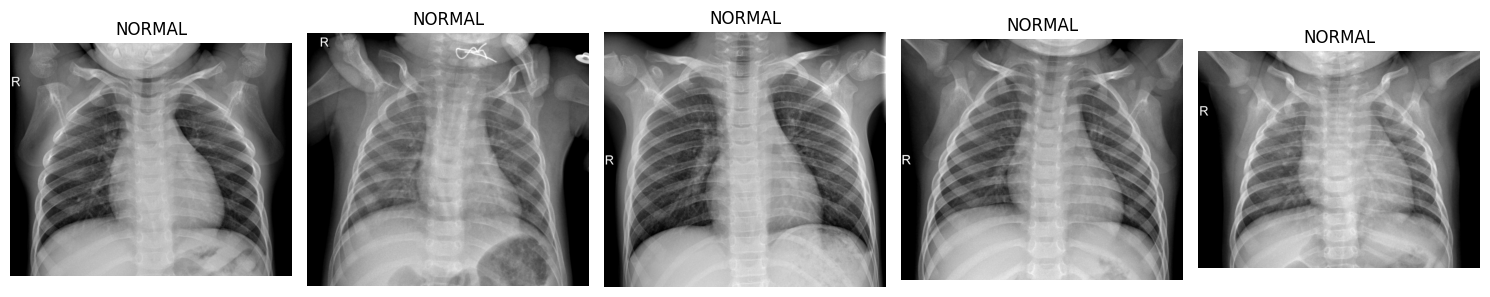

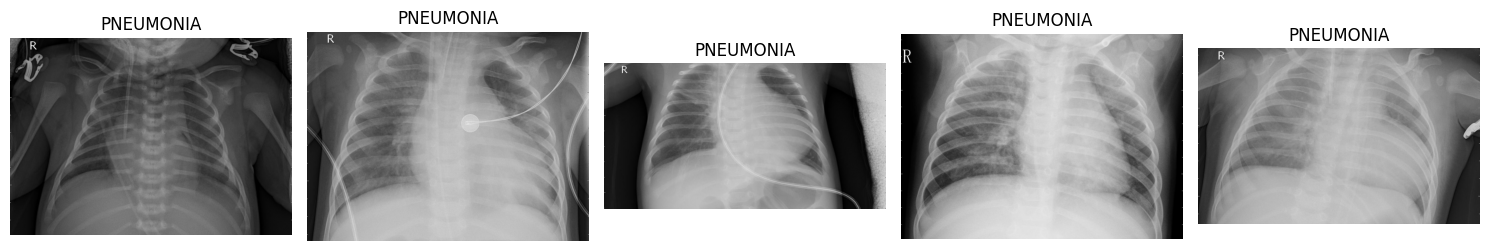

In [5]:
# Visualize normal and pneumonia samples
show_sample_images(train_dir, 'NORMAL')
show_sample_images(train_dir, 'PNEUMONIA')

## Data Preprocessing and Augmentation

To mitigate overfitting and simulate real-world variability in medical imaging, we apply a variety of computer vision augmentation techniques during training, including:

- Horizontal flipping
- Random cropping (via width and height shift)
- Rotation
- Zoom
- Brightness adjustment
- Shearing

All pixel values are rescaled to the [0, 1] range.

Medical imaging datasets are often limited in size and diversity due to patient privacy, cost, and availability. Data augmentation is a critical technique to increase the effective size of the dataset and improve model generalization.

For pneumonia detection from chest X-rays, augmentation serves several purposes:

- **Horizontal flipping** simulates anatomical variation and positional differences between left and right lungs.
- **Cropping and shifting** emulate differences in patient positioning and framing.
- **Brightness adjustments** reflect variability in exposure across X-ray machines.
- **Rotation and shear** simulate variations due to imperfect alignment of patients during scanning.
- **Zoom and scaling** improve the model’s ability to recognize pneumonia patterns at different resolutions.

These augmentations help the model learn invariant and robust features, reducing overfitting and improving performance on unseen data.

In [6]:
IMG_SIZE = (150, 150)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,             # Random rotation between -15 to 15 degrees
    width_shift_range=0.1,         # Horizontal shift
    height_shift_range=0.1,        # Vertical shift
    zoom_range=0.1,                # Random zoom
    shear_range=0.1,               # Shear angle
    horizontal_flip=True,          # Random horizontal flipping
    brightness_range=[0.8, 1.2]    # Random brightness adjustment
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

Found 5244 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
def visualize_augmentation(generator, class_label, num_images=5):
    """
    Displays augmented images for a specific class label.
    """
    batch = next(generator)
    images, labels = batch
    indices = np.where(labels == class_label)[0][:num_images]

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx].squeeze(), cmap='gray')
        plt.title(f'Label: {int(labels[idx])}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

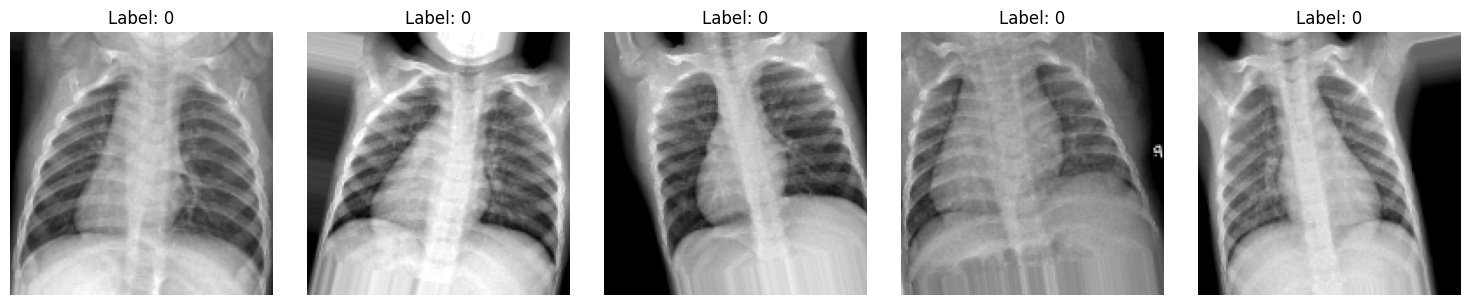

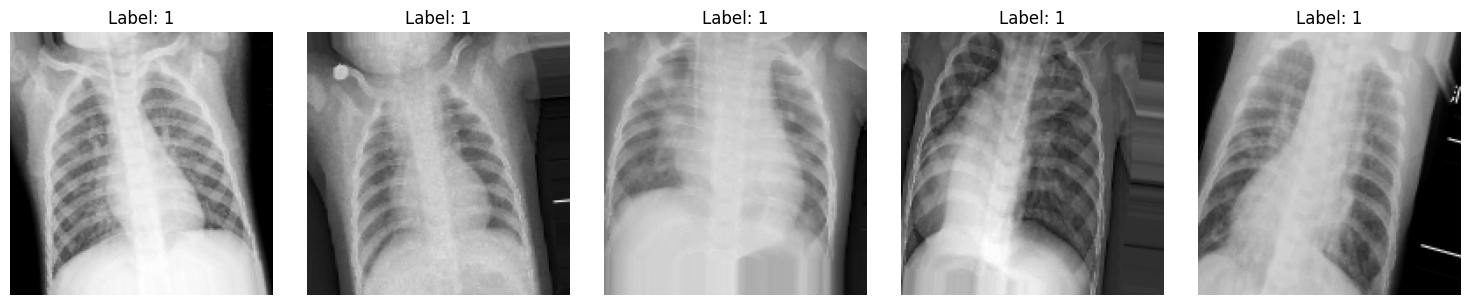

In [8]:
# Show examples of augmented 'NORMAL' (label 0) and 'PNEUMONIA' (label 1)
visualize_augmentation(train_generator, class_label=0, num_images=5)
visualize_augmentation(train_generator, class_label=1, num_images=5)

## Next Steps

- Verify class balance in the generators
- Export and visualize augmented batches
- Proceed to model training and evaluation in a separate notebook